In [259]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,auc,accuracy_score,ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [261]:
df = pd.read_csv("student_depression_dataset.csv")

In [263]:
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


In [265]:
df.shape

(27901, 18)

In [267]:
dataset=df.drop(columns=['City','Profession','Degree'])
dataset.head(10)

,id,Gender,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,Yes,3.0,1.0,No,1
1,8,Female,24.0,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,No,3.0,2.0,Yes,0
2,26,Male,31.0,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,No,9.0,1.0,Yes,0
3,30,Female,28.0,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,Yes,1.0,1.0,No,0
5,33,Male,29.0,2.0,0.0,5.70,3.0,0.0,'Less than 5 hours',Healthy,No,4.0,1.0,No,0
6,52,Male,30.0,3.0,0.0,9.54,4.0,0.0,'7-8 hours',Healthy,No,1.0,2.0,No,0
7,56,Female,30.0,2.0,0.0,8.04,4.0,0.0,'Less than 5 hours',Unhealthy,No,0.0,1.0,Yes,0
8,59,Male,28.0,3.0,0.0,9.79,1.0,0.0,'7-8 hours',Moderate,Yes,12.0,3.0,No,1
9,62,Male,31.0,2.0,0.0,8.38,3.0,0.0,'Less than 5 hours',Moderate,Yes,2.0,5.0,No,1


In [269]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 15 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   Academic Pressure                      27901 non-null  float64
 4   Work Pressure                          27901 non-null  float64
 5   CGPA                                   27901 non-null  float64
 6   Study Satisfaction                     27901 non-null  float64
 7   Job Satisfaction                       27901 non-null  float64
 8   Sleep Duration                         27901 non-null  object 
 9   Dietary Habits                         27901 non-null  object 
 10  Have you ever had suicidal thoughts ?  27901 non-null  object 
 11  Wo

In [271]:
dataset.isnull().sum()

id                                       0
Gender                                   0
Age                                      0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [273]:
dataset.duplicated().sum()

0

In [275]:
dataset.shape

(27901, 15)

In [277]:
dataset["Sleep Duration"].value_counts()

Sleep Duration
'Less than 5 hours'    8310
'7-8 hours'            7346
'5-6 hours'            6183
'More than 8 hours'    6044
Others                   18
Name: count, dtype: int64

In [279]:
dataset[dataset["Sleep Duration"]=="Others"][["Sleep Duration", "Depression"]]

,Sleep Duration,Depression
1963,Others,0
3807,Others,1
3984,Others,1
4535,Others,1
5526,Others,0
5786,Others,1
6740,Others,0
7696,Others,0
7875,Others,0
12933,Others,1


In [281]:
sleep_duration_index = {duration: i for i, duration in enumerate(dataset["Sleep Duration"].unique())}
sleep_duration_index["Others"] = sleep_duration_index["'Less than 5 hours'"]

In [283]:
dataset["Dietary Habits"].unique()

array(['Healthy', 'Moderate', 'Unhealthy', 'Others'], dtype=object)

In [285]:
dataset["Dietary Habits"].value_counts()

Dietary Habits
Unhealthy    10317
Moderate      9921
Healthy       7651
Others          12
Name: count, dtype: int64

In [287]:
dietary_habits_index = {dhabits: i for i, dhabits in enumerate(dataset["Dietary Habits"].unique())}
dietary_habits_index["Others"] = dietary_habits_index["Unhealthy"]

In [289]:
binary_map = {"Yes": 1, "No": 0}

In [291]:
gender_index = {"Male": 0, "Female": 1}

In [293]:
dataset["Gender"] = dataset["Gender"].map(gender_index)
dataset["Sleep Duration"] = dataset["Sleep Duration"].map(sleep_duration_index)
dataset["Dietary Habits"] = dataset["Dietary Habits"].map(dietary_habits_index)
dataset["Have you ever had suicidal thoughts ?"] = dataset["Have you ever had suicidal thoughts ?"].map(binary_map)
dataset["Family History of Mental Illness"] = dataset["Family History of Mental Illness"].map(binary_map)

In [295]:
dataset.dropna(inplace=True)

In [297]:
dataset.drop_duplicates(inplace=True)

In [299]:
dataset.head()

,id,Gender,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,0,33.0,5.0,0.0,8.97,2.0,0.0,0,0,1,3.0,1.0,0,1
1,8,1,24.0,2.0,0.0,5.90,5.0,0.0,0,1,0,3.0,2.0,1,0
2,26,0,31.0,3.0,0.0,7.03,5.0,0.0,1,0,0,9.0,1.0,1,0
3,30,1,28.0,3.0,0.0,5.59,2.0,0.0,2,1,1,4.0,5.0,1,1
4,32,1,25.0,4.0,0.0,8.13,3.0,0.0,0,1,1,1.0,1.0,0,0


In [301]:
X = dataset.drop(["Depression"], axis=1)
y = dataset["Depression"]

In [303]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [305]:
X_train.replace('?', np.nan, inplace=True)
X_test.replace('?', np.nan, inplace=True)

In [307]:
X_train.dropna(inplace=True)
X_test.dropna(inplace=True)
y_train = y_train.loc[X_train.index]
y_test = y_test.loc[X_test.index]

In [309]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [311]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7484321806127934


In [313]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [315]:
y_pred_gaus = nb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_gaus)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7943020963984949


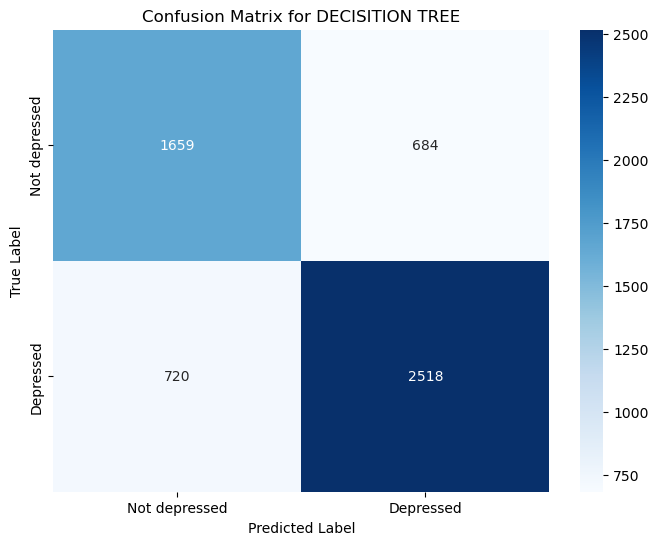

In [324]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Not depressed", "Depressed"],
            yticklabels=["Not depressed", "Depressed"])
plt.title("Confusion Matrix for DECISITION TREE")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()



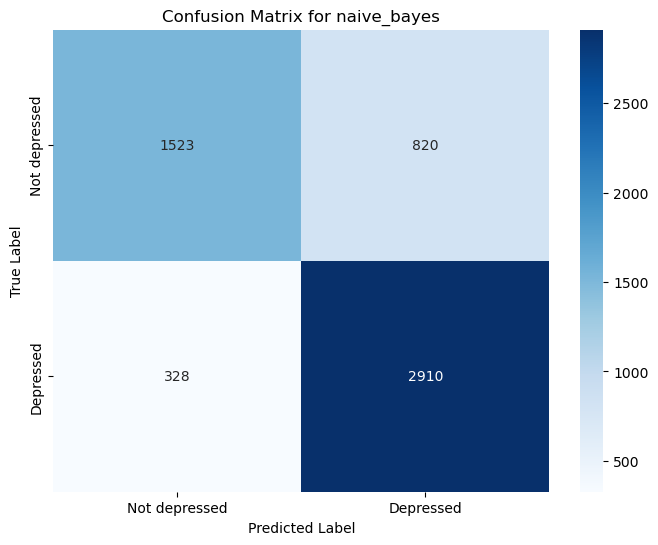

In [328]:
cm = confusion_matrix(y_test, y_pred_gaus)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Not depressed", "Depressed"],
            yticklabels=["Not depressed", "Depressed"])
plt.title("Confusion Matrix for naive_bayes")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()